### Problem 1 (40 points) Data loading and transformation

### i Load the data using pandas.read csv() into a DataFrame

In [265]:
import sys
import os
import pandas as pd
import numpy as np

np.random.seed(1103)

datadir = '/Users/yachiru/Documents/nyu/class/DSforBusinessTech/assignment/assignment3'
filename = 'Telecom_Customers_clustering.csv'

df = pd.read_csv(f'{datadir}/{filename}')

In [266]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

### ii Split your data into two dataframes, train and test, as we did in class (using
### sklearn.train test split) with 80% of the data as train.

In [267]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

In [268]:
df_train.reset_index(drop=True, inplace=True)

In [269]:
df_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3973-SKMLN,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
1,2937-FTHUR,Female,0,No,Yes,18,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,No,Electronic check,64.80,1166.70
2,8148-BPLZQ,Male,0,No,No,34,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,49.80,1734.20
3,1086-LXKFY,Female,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,69.10,69.10
4,0707-HOVVN,Female,1,No,No,70,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),75.50,5212.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6402-ZFPPI,Female,1,No,No,25,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,102.80,2660.20
5630,1110-KYLGQ,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),108.25,6780.10
5631,5928-QLDHB,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
5632,5882-CMAZQ,Female,0,Yes,Yes,5,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,34.25,163.55


In [270]:
df_test.reset_index(drop=True, inplace=True)

In [271]:
df_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5206-XZZQI,Male,0,No,No,53,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,80.60,4348.10
1,1624-WOIWJ,Female,0,No,No,10,Yes,No,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,84.70,832.05
2,6778-YSNIH,Female,0,No,No,2,Yes,No,DSL,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,59.00,114.15
3,0378-TOVMS,Female,0,No,No,3,Yes,No,Fiber optic,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,85.80,272.20
4,6500-JVEGC,Male,0,No,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),101.35,7110.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,8201-AAXCB,Male,0,Yes,Yes,25,Yes,Yes,DSL,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,60.35,1404.65
1405,0880-FVFWF,Male,0,No,No,56,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,86.40,4922.40
1406,2019-HDCZY,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,No,Electronic check,102.60,6296.75
1407,0674-GCDXG,Male,0,No,No,63,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),71.90,4479.20


In [322]:
# Three numeric attributes
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_train[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5625.000000
mean,32.591587,64.954393,2308.603876
std,24.630294,30.068406,2284.798831
min,0.000000,18.250000,18.850000
25%,9.000000,36.100000,404.350000
50%,29.000000,70.400000,1412.400000
75%,56.000000,89.950000,3871.850000
max,72.000000,118.750000,8684.800000


### iii There are 3 numerical features: tenure, MonthlyCharges, TotalCharges. For these
### features, plot histograms of the training data. Your histograms must:
### • Use 25 bins
### • Have a grid
### • Include the feature name in the title
### • Label the Y-axis (determine what the Y-axis represents if you’re not sure)

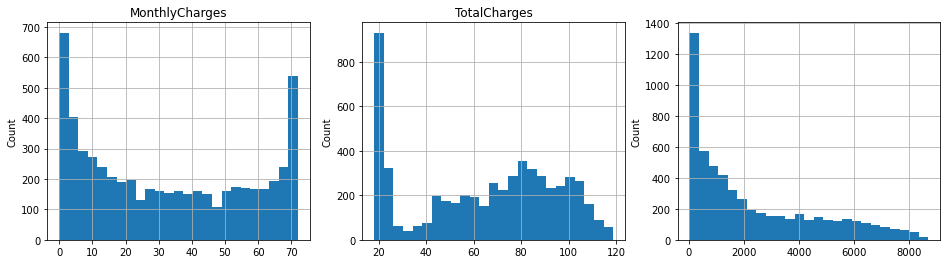

In [320]:
%matplotlib inline
import matplotlib.pyplot as plt

cols = 3
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(16,4))

for i in range(len(numerical_features)):
    feat = numerical_features[i]
    this_ax.set_title(feat)
    this_ax = axes[i]
    this_ax.hist(df_train[feat], bins=25)
    this_ax.grid()
    this_ax.set_ylabel("Count")
    
plt.show()

### iv For 2 of the numerical features, tenure, MonthlyCharges, calculate the mean, µ,
### and the standard deviation, σ, from the training data only

In [275]:
tenure_mean = df_train['tenure'].mean()
tenure_std = df_train['tenure'].std()

print("mean and standard deviaion of tenure:")
print(tenure_mean)
print(tenure_std)

MonthlyCharges_mean = df_train['MonthlyCharges'].mean()
MonthlyCharges_std = df_train['MonthlyCharges'].std()

print("mean and standard deviaion of MonthlyCharges:")
print(MonthlyCharges_mean)
print(MonthlyCharges_std)

mean and standard deviaion of tenure:
32.591586794462195
24.630294012406676
mean and standard deviaion of MonthlyCharges:
64.95439297124571
30.06840563082492


### v Standardize tenure, MonthlyCharges in both your train and test dataframes by
### subtracting corresponding µ and dividing by the corresponding σ (as computed
### from the training data). Do not overwrite the original columns. Instead, create
### two new columns: tenure std, MonthlyCharges std

In [276]:
# Create new columns called tenure_std, MonthlyCharges_std
train_add = pd.DataFrame(columns=['tenure_std','MonthlyCharges_std'])
test_add = pd.DataFrame(columns=['tenure_std','MonthlyCharges_std'])

In [277]:
train_add["tenure_std"] = (df_train["tenure"] - tenure_mean) / tenure_std
train_add["MonthlyCharges_std"] = (df_train["MonthlyCharges"] - MonthlyCharges_mean) / MonthlyCharges_std

test_add["tenure_std"] = (df_test["tenure"] - tenure_mean) / tenure_std
test_add["MonthlyCharges_std"] = (df_test["MonthlyCharges"] - MonthlyCharges_mean) / MonthlyCharges_std

In [278]:
df_train = pd.concat([df_train, train_add], axis=1)
df_test = pd.concat([df_test, test_add], axis=1)

In [279]:
display(df_train)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_std,MonthlyCharges_std
0,3973-SKMLN,Male,0,No,No,71,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,1.559397,-1.498396
1,2937-FTHUR,Female,0,No,Yes,18,Yes,Yes,DSL,Yes,...,No,No,Yes,Month-to-month,No,Electronic check,64.80,1166.70,-0.592424,-0.005135
2,8148-BPLZQ,Male,0,No,No,34,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,49.80,1734.20,0.057182,-0.503997
3,1086-LXKFY,Female,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,69.10,69.10,-1.282631,0.137873
4,0707-HOVVN,Female,1,No,No,70,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),75.50,5212.65,1.518797,0.350721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6402-ZFPPI,Female,1,No,No,25,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Month-to-month,Yes,Mailed check,102.80,2660.20,-0.308222,1.258650
5630,1110-KYLGQ,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Month-to-month,No,Credit card (automatic),108.25,6780.10,1.234594,1.439904
5631,5928-QLDHB,Male,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,-0.957828,0.375664
5632,5882-CMAZQ,Female,0,Yes,Yes,5,No,No phone service,DSL,No,...,Yes,No,No,Month-to-month,No,Electronic check,34.25,163.55,-1.120230,-1.021151


In [280]:
display(df_test)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_std,MonthlyCharges_std
0,5206-XZZQI,Male,0,No,No,53,Yes,No,Fiber optic,No,...,Yes,No,No,Month-to-month,Yes,Mailed check,80.60,4348.10,0.828590,0.520334
1,1624-WOIWJ,Female,0,No,No,10,Yes,No,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Mailed check,84.70,832.05,-0.917228,0.656690
2,6778-YSNIH,Female,0,No,No,2,Yes,No,DSL,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,59.00,114.15,-1.242031,-0.198028
3,0378-TOVMS,Female,0,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,Yes,Month-to-month,No,Electronic check,85.80,272.20,-1.201431,0.693273
4,6500-JVEGC,Male,0,No,No,68,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,One year,No,Bank transfer (automatic),101.35,7110.75,1.437596,1.210427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,8201-AAXCB,Male,0,Yes,Yes,25,Yes,Yes,DSL,No,...,No,Yes,No,Month-to-month,No,Electronic check,60.35,1404.65,-0.308222,-0.153131
1405,0880-FVFWF,Male,0,No,No,56,Yes,Yes,Fiber optic,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,86.40,4922.40,0.950391,0.713227
1406,2019-HDCZY,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Two year,No,Electronic check,102.60,6296.75,1.234594,1.251999
1407,0674-GCDXG,Male,0,No,No,63,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),71.90,4479.20,1.234594,0.230994


### vi Instantiate an object of the OneHotEncoder class from sklearn, with drop=’first’.
### Call fit on this object using only one column, InternetService from the training
### data.

### a Using this trained object, call transform for the same column from both the
### training and test datasets and append these newly created columns to the
### corresponding datafames with column names obtained from the OneHotEncoder

In [353]:
from sklearn import preprocessing

ohe = preprocessing.OneHotEncoder(drop='first')

In [354]:
ohe.fit(df_train[['InternetService']])

OneHotEncoder(drop='first')

In [355]:
ohe.transform(df_train[['InternetService']])

<5634x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3685 stored elements in Compressed Sparse Row format>

In [356]:
ohe.transform(df_train[['InternetService']]).toarray()

array([[0., 1.],
       [0., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [0., 0.],
       [0., 0.]])

In [357]:
ohe.get_feature_names()

array(['x0_Fiber optic', 'x0_No'], dtype=object)

In [358]:
ohe_values = ohe.transform(df_train[['InternetService']]).toarray()

In [359]:
ohe_names = ohe.get_feature_names()

In [360]:
column_values_dict = dict(zip(ohe_names, ohe_values.transpose()))

In [361]:
new_df = pd.DataFrame(column_values_dict)
display(new_df)

,x0_Fiber optic,x0_No
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
5629,1.0,0.0
5630,1.0,0.0
5631,1.0,0.0
5632,0.0,0.0


In [362]:
df_train = pd.concat([df_train, new_df], axis=1)
display(df_train)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,tenure_std,MonthlyCharges_std,x0_Fiber optic,x0_No,cluster,x0_Fiber optic,x0_No
0,3973-SKMLN,Male,0,No,No,71,Yes,No,No,No internet service,...,Credit card (automatic),19.90,1355.10,1.559397,-1.498396,0.0,1.0,0,0.0,1.0
1,2937-FTHUR,Female,0,No,Yes,18,Yes,Yes,DSL,Yes,...,Electronic check,64.80,1166.70,-0.592424,-0.005135,0.0,0.0,4,0.0,0.0
2,8148-BPLZQ,Male,0,No,No,34,Yes,No,DSL,No,...,Electronic check,49.80,1734.20,0.057182,-0.503997,0.0,0.0,5,0.0,0.0
3,1086-LXKFY,Female,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,Mailed check,69.10,69.10,-1.282631,0.137873,1.0,0.0,4,1.0,0.0
4,0707-HOVVN,Female,1,No,No,70,Yes,Yes,DSL,No,...,Bank transfer (automatic),75.50,5212.65,1.518797,0.350721,0.0,0.0,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6402-ZFPPI,Female,1,No,No,25,Yes,Yes,Fiber optic,Yes,...,Mailed check,102.80,2660.20,-0.308222,1.258650,1.0,0.0,1,1.0,0.0
5630,1110-KYLGQ,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,...,Credit card (automatic),108.25,6780.10,1.234594,1.439904,1.0,0.0,3,1.0,0.0
5631,5928-QLDHB,Male,0,No,No,9,Yes,Yes,Fiber optic,No,...,Electronic check,76.25,684.85,-0.957828,0.375664,1.0,0.0,4,1.0,0.0
5632,5882-CMAZQ,Female,0,Yes,Yes,5,No,No phone service,DSL,No,...,Electronic check,34.25,163.55,-1.120230,-1.021151,0.0,0.0,2,0.0,0.0


In [363]:
# the same step with ohe but different data
ohe_test = preprocessing.OneHotEncoder(drop='first')
ohe_test.fit(df_test[['InternetService']])
ohe_values = ohe_test.transform(df_test[['InternetService']]).toarray()
ohe_names = ohe_test.get_feature_names()
column_values_dict = dict(zip(ohe_names, ohe_values.transpose()))

In [364]:
new_df = pd.DataFrame(column_values_dict)
display(new_df)

,x0_Fiber optic,x0_No
0,1.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1404,0.0,0.0
1405,1.0,0.0
1406,1.0,0.0
1407,0.0,0.0


In [365]:
df_test = pd.concat([df_test, new_df], axis=1)
display(df_test)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,tenure_std,MonthlyCharges_std,x0_Fiber optic,x0_No,cluster,x0_Fiber optic,x0_No
0,5206-XZZQI,Male,0,No,No,53,Yes,No,Fiber optic,No,...,Mailed check,80.60,4348.10,0.828590,0.520334,1.0,0.0,3,1.0,0.0
1,1624-WOIWJ,Female,0,No,No,10,Yes,No,Fiber optic,Yes,...,Mailed check,84.70,832.05,-0.917228,0.656690,1.0,0.0,0,1.0,0.0
2,6778-YSNIH,Female,0,No,No,2,Yes,No,DSL,No,...,Electronic check,59.00,114.15,-1.242031,-0.198028,0.0,0.0,0,0.0,0.0
3,0378-TOVMS,Female,0,No,No,3,Yes,No,Fiber optic,No,...,Electronic check,85.80,272.20,-1.201431,0.693273,1.0,0.0,0,1.0,0.0
4,6500-JVEGC,Male,0,No,No,68,Yes,Yes,Fiber optic,Yes,...,Bank transfer (automatic),101.35,7110.75,1.437596,1.210427,1.0,0.0,3,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,8201-AAXCB,Male,0,Yes,Yes,25,Yes,Yes,DSL,No,...,Electronic check,60.35,1404.65,-0.308222,-0.153131,0.0,0.0,0,0.0,0.0
1405,0880-FVFWF,Male,0,No,No,56,Yes,Yes,Fiber optic,Yes,...,Electronic check,86.40,4922.40,0.950391,0.713227,1.0,0.0,3,1.0,0.0
1406,2019-HDCZY,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,Electronic check,102.60,6296.75,1.234594,1.251999,1.0,0.0,3,1.0,0.0
1407,0674-GCDXG,Male,0,No,No,63,Yes,Yes,DSL,Yes,...,Bank transfer (automatic),71.90,4479.20,1.234594,0.230994,0.0,0.0,3,0.0,0.0


### b Why did we use drop=’first’ ?

When we use one-hot-encoding, there'll be extra column created. "drop = first" delete the extra column.

### Problem 2

In [406]:
from sklearn.cluster import KMeans

In [407]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_centroids(df, col1, col2, cluster_column, centroids):
    df.plot.scatter(col1, col2)
    colors=['red','green', 'blue', 'orange', 'black', 'brown']
    for i in range(len(centroids)):
        plt.plot(df.loc[df[cluster_column]==i, col1], \
                df.loc[df[cluster_column]==i, col2], \
                color=colors[i], ls='', marker='.', label='_nolegend_')
        plt.plot(centroids[i][0], centroids[i][1], color=colors[i], \
                label=f'centroid{i+1}', marker='*', markersize=20, \
                markeredgecolor='black', markeredgewidth=1.5)
    plt.legend(loc='best')
    plt.show()
    plt.close()

In [408]:
freature_names = ['tenure_std', 'MonthlyCharges_std']

In [409]:
X_train = df_train[freature_names]
X_test = df_test[freature_names]

result = KMeans(n_clusters=3, random_state=0).fit(X_train)

In [410]:
np.random

<module 'numpy.random' from '/Users/yachiru/opt/anaconda3/lib/python3.8/site-packages/numpy/random/__init__.py'>

In [411]:
n_centroids = result.cluster_centers_
df_train['cluster'] = result.predict(X_train)

In [412]:
df_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,tenure_std,MonthlyCharges_std,x0_Fiber optic,x0_No,cluster,x0_Fiber optic,x0_No
0,3973-SKMLN,Male,0,No,No,71,Yes,No,No,No internet service,...,Credit card (automatic),19.90,1355.10,1.559397,-1.498396,0.0,1.0,0,0.0,1.0
1,2937-FTHUR,Female,0,No,Yes,18,Yes,Yes,DSL,Yes,...,Electronic check,64.80,1166.70,-0.592424,-0.005135,0.0,0.0,2,0.0,0.0
2,8148-BPLZQ,Male,0,No,No,34,Yes,No,DSL,No,...,Electronic check,49.80,1734.20,0.057182,-0.503997,0.0,0.0,0,0.0,0.0
3,1086-LXKFY,Female,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,Mailed check,69.10,69.10,-1.282631,0.137873,1.0,0.0,2,1.0,0.0
4,0707-HOVVN,Female,1,No,No,70,Yes,Yes,DSL,No,...,Bank transfer (automatic),75.50,5212.65,1.518797,0.350721,0.0,0.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6402-ZFPPI,Female,1,No,No,25,Yes,Yes,Fiber optic,Yes,...,Mailed check,102.80,2660.20,-0.308222,1.258650,1.0,0.0,2,1.0,0.0
5630,1110-KYLGQ,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,...,Credit card (automatic),108.25,6780.10,1.234594,1.439904,1.0,0.0,1,1.0,0.0
5631,5928-QLDHB,Male,0,No,No,9,Yes,Yes,Fiber optic,No,...,Electronic check,76.25,684.85,-0.957828,0.375664,1.0,0.0,2,1.0,0.0
5632,5882-CMAZQ,Female,0,Yes,Yes,5,No,No phone service,DSL,No,...,Electronic check,34.25,163.55,-1.120230,-1.021151,0.0,0.0,0,0.0,0.0


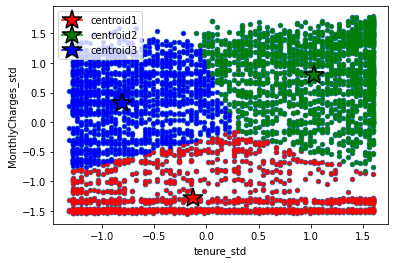

In [413]:
plot_centroids(df_train, 'tenure_std', 'MonthlyCharges_std', 'cluster', n_centroids)

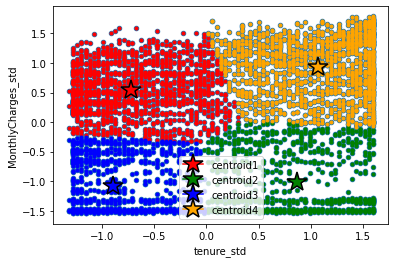

In [414]:
kmeans_4cluster = KMeans(n_clusters=4, random_state=0).fit(X_train)
df_train['cluster'] = kmeans_4cluster.predict(X_train)
n_centroids = kmeans_4cluster.cluster_centers_
plot_centroids(df_train, 'tenure_std', 'MonthlyCharges_std', 'cluster', n_centroids)

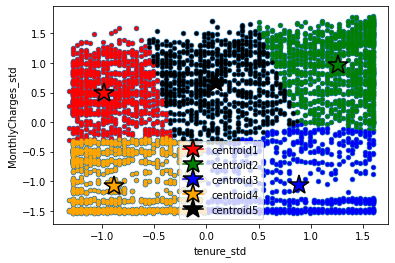

In [415]:
kmeans_5cluster = KMeans(n_clusters=5, random_state=0).fit(X_train)
df_train['cluster'] = kmeans_5cluster.predict(X_train)
n_centroids = kmeans_5cluster.cluster_centers_
plot_centroids(df_train, 'tenure_std', 'MonthlyCharges_std', 'cluster', n_centroids)

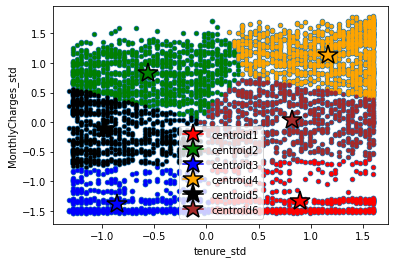

In [416]:
kmeans_6cluster = KMeans(n_clusters=6, random_state=0).fit(X_train)
df_train['cluster'] = kmeans_6cluster.predict(X_train)
n_centroids = kmeans_6cluster.cluster_centers_
plot_centroids(df_train, 'tenure_std', 'MonthlyCharges_std', 'cluster', n_centroids)

### ii Looking at these 4 plots, pick one that you think segments your customers into useful groups,
### report the choice you made. Give your segments names (or a brief description) that you think
### describe these segments.

The number of cluster is 4 plays better. The blue part represents for those who create relationship. The red one is the customers who consume occasionally. The yellow part represents for loyal customers and the green one is those seeking for relationships.

In [417]:
result = KMeans(n_clusters=4, random_state=0).fit(X_train)
df_test['cluster'] = result.predict(X_test)

In [418]:
display(df_test)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,tenure_std,MonthlyCharges_std,x0_Fiber optic,x0_No,cluster,x0_Fiber optic,x0_No
0,5206-XZZQI,Male,0,No,No,53,Yes,No,Fiber optic,No,...,Mailed check,80.60,4348.10,0.828590,0.520334,1.0,0.0,3,1.0,0.0
1,1624-WOIWJ,Female,0,No,No,10,Yes,No,Fiber optic,Yes,...,Mailed check,84.70,832.05,-0.917228,0.656690,1.0,0.0,0,1.0,0.0
2,6778-YSNIH,Female,0,No,No,2,Yes,No,DSL,No,...,Electronic check,59.00,114.15,-1.242031,-0.198028,0.0,0.0,0,0.0,0.0
3,0378-TOVMS,Female,0,No,No,3,Yes,No,Fiber optic,No,...,Electronic check,85.80,272.20,-1.201431,0.693273,1.0,0.0,0,1.0,0.0
4,6500-JVEGC,Male,0,No,No,68,Yes,Yes,Fiber optic,Yes,...,Bank transfer (automatic),101.35,7110.75,1.437596,1.210427,1.0,0.0,3,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,8201-AAXCB,Male,0,Yes,Yes,25,Yes,Yes,DSL,No,...,Electronic check,60.35,1404.65,-0.308222,-0.153131,0.0,0.0,0,0.0,0.0
1405,0880-FVFWF,Male,0,No,No,56,Yes,Yes,Fiber optic,Yes,...,Electronic check,86.40,4922.40,0.950391,0.713227,1.0,0.0,3,1.0,0.0
1406,2019-HDCZY,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,Electronic check,102.60,6296.75,1.234594,1.251999,1.0,0.0,3,1.0,0.0
1407,0674-GCDXG,Male,0,No,No,63,Yes,Yes,DSL,Yes,...,Bank transfer (automatic),71.90,4479.20,1.234594,0.230994,0.0,0.0,3,0.0,0.0


In [419]:
n_centroids = result.cluster_centers_

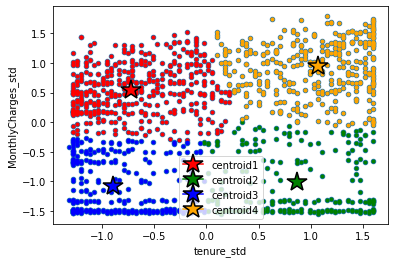

In [420]:
plot_centroids(df_test, 'tenure_std', 'MonthlyCharges_std', 'cluster', n_centroids)

### iv We fixed the random seed so results are consistent. What part of the K-Means algorithm is
### random?

The centroids of the K-Means algorithm is random. We select number of n_clusters centroids randomly to start iteration and get the better result.

### Problem3

 (30 points) Instantiate a sklearn.linear model.LinearRegression() object as we
did in class and fit it with the feature tenure and the one hot encoded features created
from the InternetService column. Use MonthlyCharges as your target variable.

In [311]:
from sklearn import linear_model

In [312]:
features = ['tenure', 'x0_Fiber optic', 'x0_No']

In [313]:
x = np.matrix(df_train[features].values)
y = np.matrix(df_train[['MonthlyCharges']])

In [314]:
lm = linear_model.LinearRegression(fit_intercept=True)
lm.fit(x, y)

LinearRegression()

### i What is the intercept of your linear regression

In [315]:
print(lm.intercept_)

[49.25546423]


### ii What is the coefficient on the tenure feature?

In [316]:
print(lm.coef_[0][0])

0.2678836175343027


### iii How many one hot encoded columns did you obtain from the InternetService
### column and what are the coefficients?

There are two one hot encoded columns due to three attributes.

In [317]:
print("The coefficient of x0_Fiber optic:")
print(lm.coef_[0][1])
print("The coefficient of x0_No:")
print(lm.coef_[0][2])

The coefficient of x0_Fiber optic:
33.487204168212024
The coefficient of x0_No:
-36.339883461547394


### iv Call predict() on your trained object with the corresponding feature columns
### passed in from the test data. Calculate r-squared using sklearn.metrics.r2 score()
### to compare these predicted values to the target variable from your test data set.

In [318]:
from sklearn import metrics

test_real = df_test['MonthlyCharges'].values
test_predict = lm.predict(df_test[features])

### a Report the r-squared value.

In [381]:
print(metrics.r2_score(test_real, test_predict))

0.8678955192425921


### b Is this value low or high, in your opinion?

Since value of MonthlyCharge is highly represented by tensure. The value is high.